In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE=0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [5]:
# visualization
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()


,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.target.unique()

array([0, 1], dtype=int64)

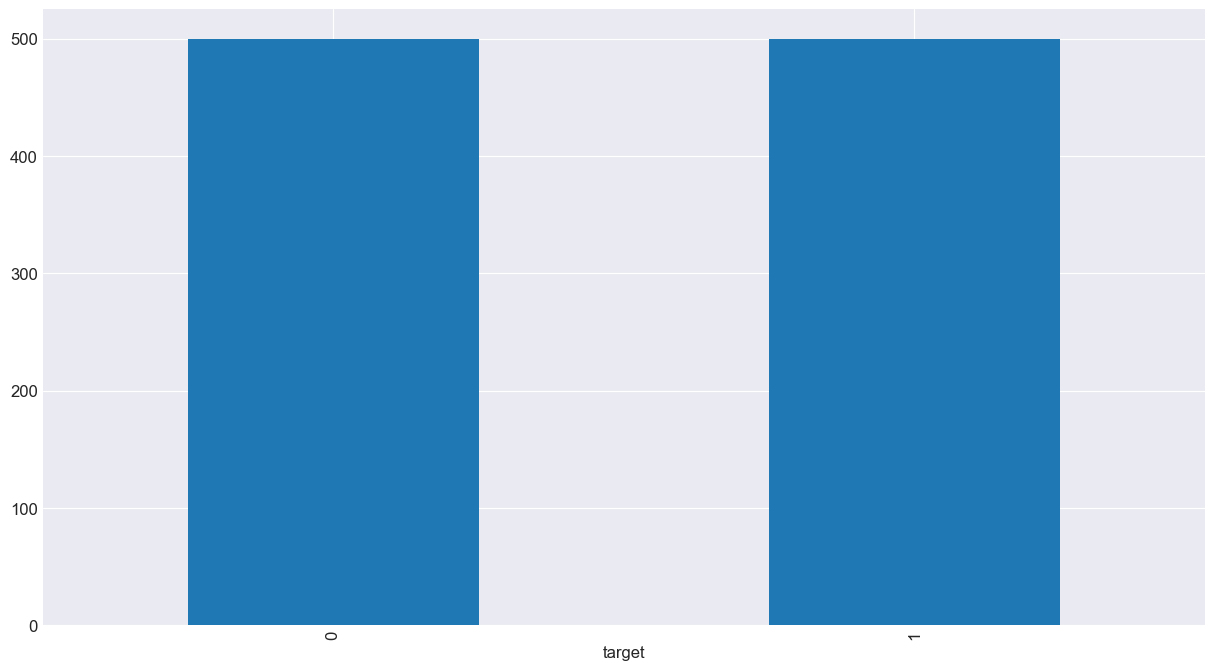

In [7]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

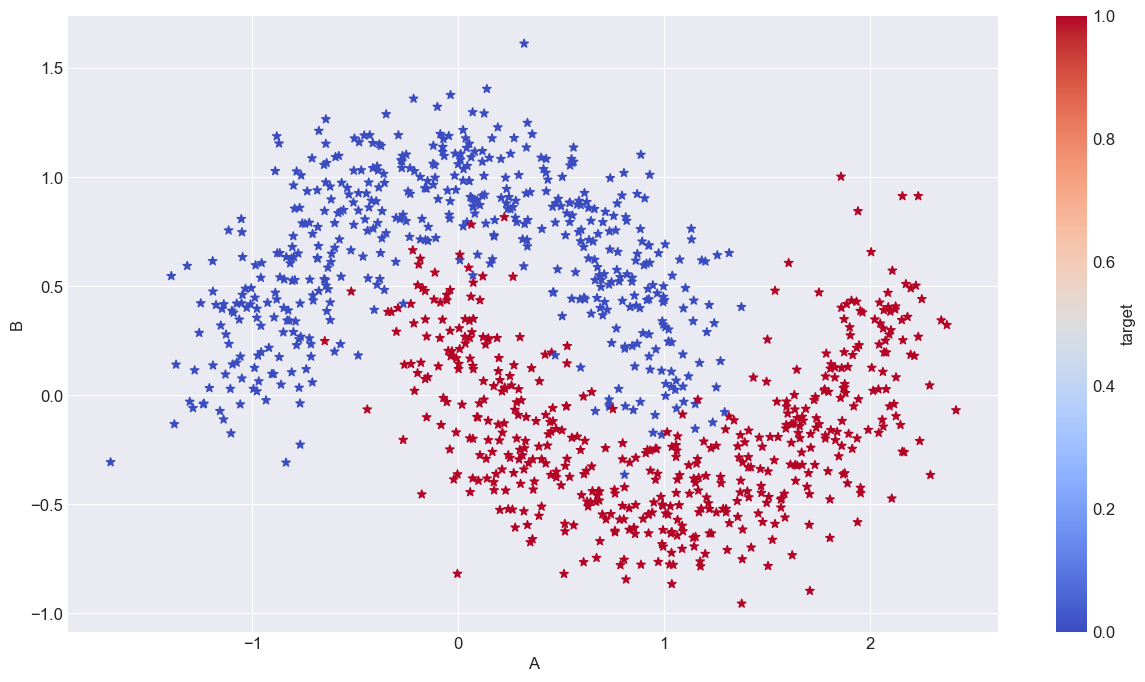

In [8]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

In [9]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [10]:
X_train, X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=TEST_SIZE,
                                                 stratify=y,
                                                 random_state=RANDOM_STATE)

In [11]:
data_train, data_test=data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [12]:
data_test.shape

(100, 3)

In [13]:
data_train.shape

(900, 3)

In [14]:
print(type(data_train), type(data_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
#Function to make predictions
def predict(row: np.ndarray, weights : np.ndarray) -> np.float64:
    z = weights[0] # Initialize with b, bias
    
    for i in range(len(row)-1):
        
        z += weights[i + 1] * row[i] # and weights are added here to the values

    return 1 if z >=0  else 0 # simplest form of activation function

In [16]:
#Unit test
weights = np.array([0.1, 2.0, 1.0])

display(data_df.loc[0])

predict(data_df.loc[0].values, weights)

A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

1

In [17]:
def train_weights(train : np.ndarray, alpha : np.float64, n_epoch: np.int64):
    errors = []
    
    #Initialize Weights. In theory b can be zero. For sake of simplicity, let's initialize b as well.         
    weights = rng.random(train.shape[1])
    
    # find m; number of samples
    m = train.shape[0]
    
    for epoch in range(n_epoch): # loop for number of epochs
        
        sum_error = 0.0
        for row in train:
            
            prediction = predict(row, weights) # make prediction by row
                
            dz = prediction - row[-1] # dz = (a-y) 
            
            sum_error += (prediction - row[-1])**2 # cumulative error for this epoch
            weights[0] = weights[0] - alpha * dz / m  # update b
            
            for i in range(len(row)-1):
                
                weights[i + 1] = weights[i + 1] - alpha * dz * row[i] / m # update rest of the weights
        
        errors.append(sum_error / m) # append average error
        
    return errors, weights
        

In [18]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)

print(weights)

[-6.44966640e-05  2.40695264e-04 -3.57032974e-04]


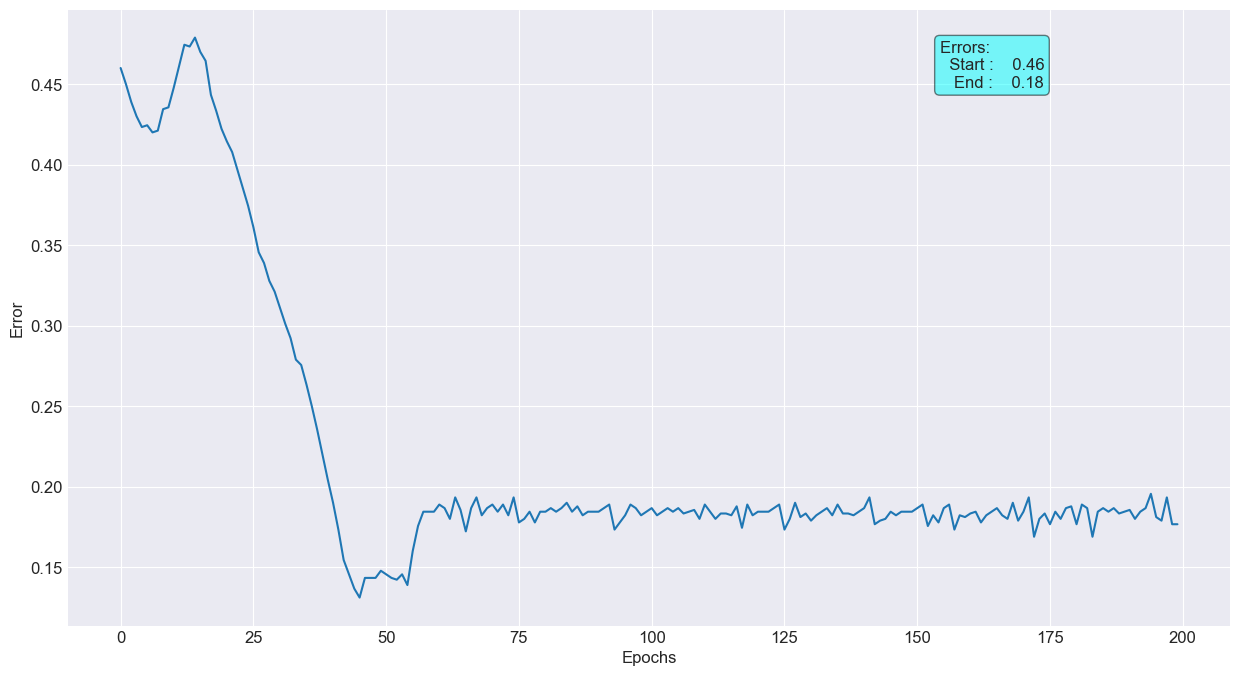

In [19]:
fig, ax = plt.subplots()
ax.plot(errors);

# Little beautification
txtstr = "Errors: \n  Start : {:7.2f}\n   End : {:7.2f}".format(errors[0],errors[-1]) #text to plot

# Properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

# Place a text box in upper left in axes coords

ax.text(0.75, 0.95, txtstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Labeling the Plot
ax.set_xlabel("Epochs")
ax.set_ylabel("Error");

In [20]:
predictions = []

for row in data_train:
    
    prediction = predict(row, weights)
    
    predictions.append(prediction)
accuracy_score(data_train[:,-1], predictions)

0.8311111111111111

In [21]:
predictions = []

for row in data_test:

    pred = predict(row, weights)
    
    y_p = 1 if pred >= 0.5 else 0
    predictions.append(y_p)

accuracy_score(data_test[:, -1], predictions)

0.89

In [22]:
cm = confusion_matrix(data_test[:,-1], predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

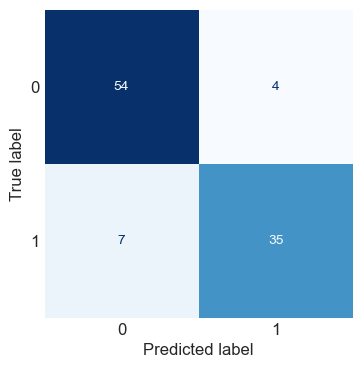

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);